In [19]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
def PullTicket(symbol,start='2015-1-1', end='2020-3-10'):
    tickerData = yf.Ticker(symbol)
    tickerdf = tickerData.history(period='1d', start=start, end=end)
    tickerdf = pd.DataFrame(tickerdf).reset_index()
    tickerdf=tickerdf[['Date','Close']]
    tickerdf.columns = ['Date',symbol]
    return tickerdf

airlines = ['AAL', 'MCK','DAL','CPB','KMB']

AAL = PullTicket(airlines[0])
MCK = PullTicket(airlines[1])
DAL = PullTicket(airlines[2])
CPB = PullTicket(airlines[3])
KMB = PullTicket(airlines[4])

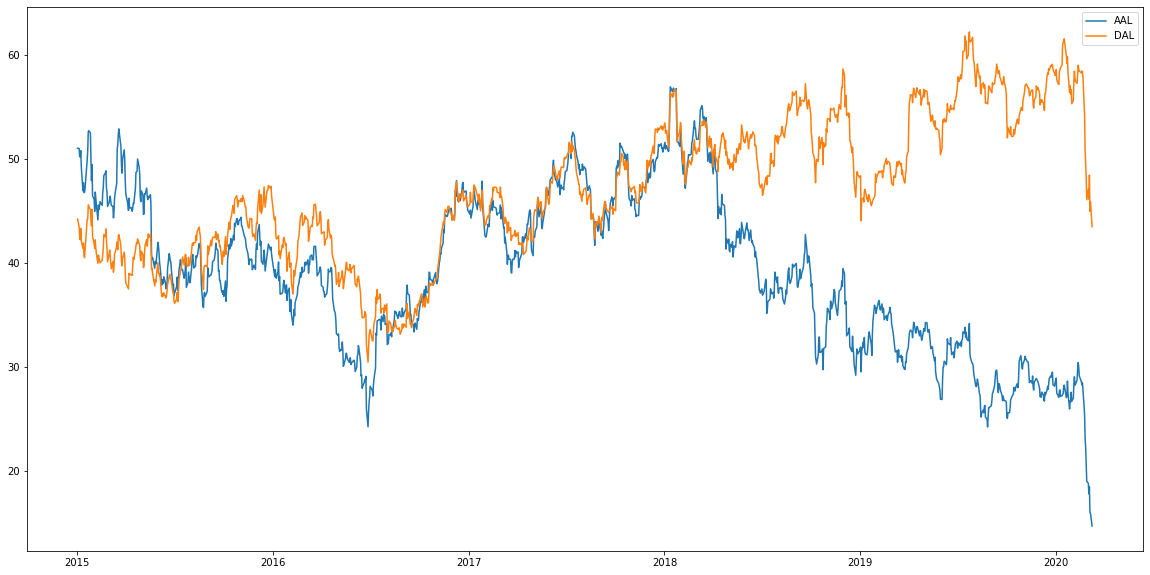

In [113]:

plt.figure(figsize=(20,10))
plt.plot(AAL['Date'],AAL['AAL'], label ='AAL')
plt.plot(DAL['Date'],DAL['DAL'], label ='DAL')
#plt.plot(CPB['Date'],CPB['CPB'], label ='CPB')
#plt.plot(KMB['Date'],KMB['KMB'], label ='KMB')
plt.legend()

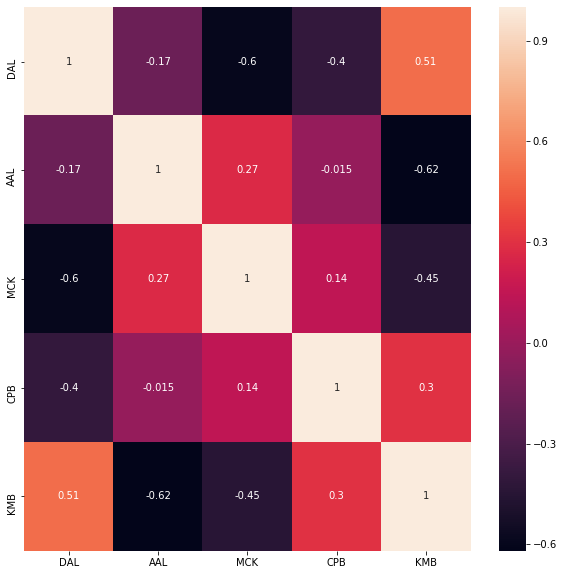

In [109]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.concat([DAL,
           AAL.iloc[:,1],
           MCK.iloc[:,1],
          CPB.iloc[:,1],
           KMB.iloc[:,1]],
          axis=1).corr(),annot=True)